In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras

In [2]:
df = pd.read_csv('Data/2025_02_28_M9_combined.csv')
df = df.dropna(subset=['Sequence'])
df = df[df['Rel_RFP'] > 0]
df['Rel_log_RFP'] = np.log1p(df['Rel_RFP'])

df.head()

,Strain,Sequence,Rep,Date,Abs590,Ex550Em630,Rel_RFP,Pred_RFP,Rel_log_RFP
2,pLac,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,Rep1,2024_07_03,1.124517,143364.5,1.274899e+05,0.337836,11.755800
3,pLac,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,Rep2,2024_07_03,1.172258,154328.5,1.316506e+05,0.337836,11.787915
4,Low,AATACTAGAGGTCTTCCGACTTGACACTATTTCCTATTTCTCTTAT...,Rep1,2024_07_03,1.097638,1665030.0,1.516921e+06,0.419188,14.232194
5,Low,AATACTAGAGGTCTTCCGACTTGACACTATTTCCTATTTCTCTTAT...,Rep2,2024_07_03,1.179940,1871351.5,1.585972e+06,0.419188,14.276709
6,Medium,AATACTAGAGGTCTTCCGACAAGACGCTATTTCCTATTTCTCTTAT...,Rep1,2024_07_03,0.589719,182165.5,3.089020e+05,0.365856,12.640783


In [3]:
model = keras.saving.load_model('Models/CNN_6_1_2.keras')

def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = []
    for nucleotide in sequence:
         encoding += [mapping[nucleotide]]
    return encoding

df['Pred_RFP'] = model.predict(np.array([padded_one_hot_encode(seq.zfill(150)) for seq in df['Sequence']])).flatten()
df.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


,Strain,Sequence,Rep,Date,Abs590,Ex550Em630,Rel_RFP,Pred_RFP,Rel_log_RFP
2,pLac,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,Rep1,2024_07_03,1.124517,143364.5,1.274899e+05,0.337836,11.755800
3,pLac,AATACTAGAGGTCTTCCGACTTTACACTTTATGCTTCCGGCTCGTA...,Rep2,2024_07_03,1.172258,154328.5,1.316506e+05,0.337836,11.787915
4,Low,AATACTAGAGGTCTTCCGACTTGACACTATTTCCTATTTCTCTTAT...,Rep1,2024_07_03,1.097638,1665030.0,1.516921e+06,0.419188,14.232194
5,Low,AATACTAGAGGTCTTCCGACTTGACACTATTTCCTATTTCTCTTAT...,Rep2,2024_07_03,1.179940,1871351.5,1.585972e+06,0.419188,14.276709
6,Medium,AATACTAGAGGTCTTCCGACAAGACGCTATTTCCTATTTCTCTTAT...,Rep1,2024_07_03,0.589719,182165.5,3.089020e+05,0.365856,12.640783


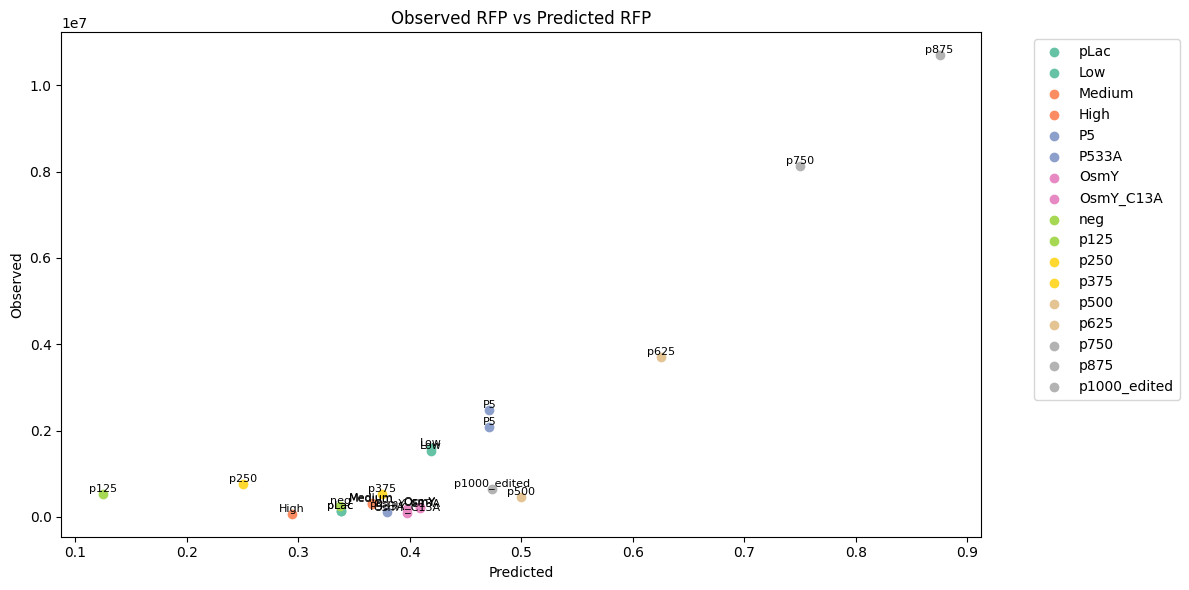

In [4]:
unique_promoters = df['Strain'].unique()
colors = plt.cm.Set2(np.linspace(0, 1, len(unique_promoters)))
color_map = {promoter: colors[i] for i, promoter in enumerate(unique_promoters)}

plt.figure(figsize=(12, 6))

for promoter in unique_promoters:
    subset = df[df['Strain'] == promoter]
    color = color_map[promoter]
    plt.scatter(subset['Pred_RFP'], subset['Rel_RFP'], c=[color], label=promoter)

plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Observed RFP vs Predicted RFP')

for row in df.iterrows():
    plt.text(row[1]['Pred_RFP'], row[1]['Rel_RFP'], row[1]['Strain'], fontsize=8, ha='center', va='bottom')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()